In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import os

def savitzky_golay_coeff(y, window_size, order, deriv=0, rate=1):
    """"get Savitzky-Golay coefficients
    
    I think this fn came from chatgpt?
    """
    # Ensure window size is odd and greater than the polynomial order
    window_size = np.abs(int(window_size))
    order = np.abs(int(order))
    if window_size % 2 != 1 or window_size < 1:
        raise ValueError("window_size must be a positive odd number")
    if window_size < order + 2:
        raise ValueError("window_size is too small for the polynomial order")

    # Precompute coefficients
    half_window = (window_size - 1) // 2
    b = np.mat([[k**i for i in range(order + 1)] for k in range(-half_window, half_window + 1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)
    return m

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    m = savitzky_golay_coeff(y, window_size, order, deriv=deriv, rate=rate)
    # Pad the signal at the extremes with values taken from the signal itself
    firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))

    return np.convolve(m[::-1], y, mode='valid')



C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


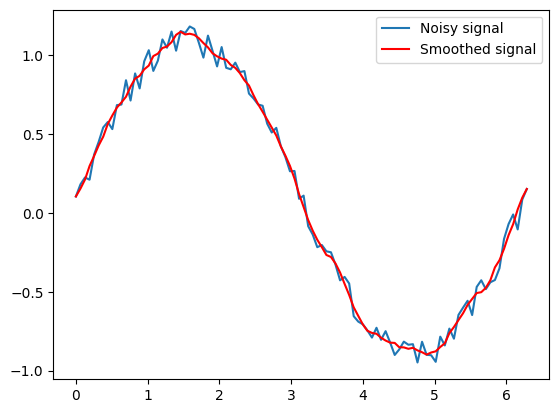

In [5]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
y_smooth = savitzky_golay(y, window_size, polyorder)

# Plot the results
plt.plot(x, y, label='Noisy signal')
plt.plot(x, y_smooth, label='Smoothed signal', color='red')
plt.legend()
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


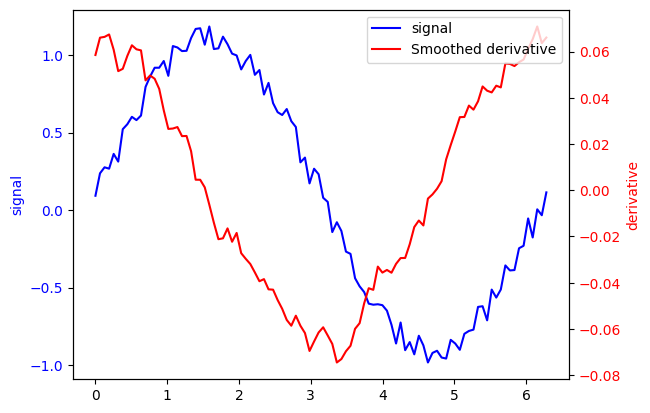

In [9]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
d1_smooth = savitzky_golay(y, window_size, polyorder, deriv=1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(x, y, label='signal', color='blue')
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, d1_smooth, label='Smoothed derivative', color='red')
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

In [ ]:
window_len = 13
polyorder=2
use='conv' # 'dot' or 'conv'
filter_d0 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=0,
    pos=window_len-1,
    use=use
)
filter_d1 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=1,
    pos=window_len-1,
    use=use
)

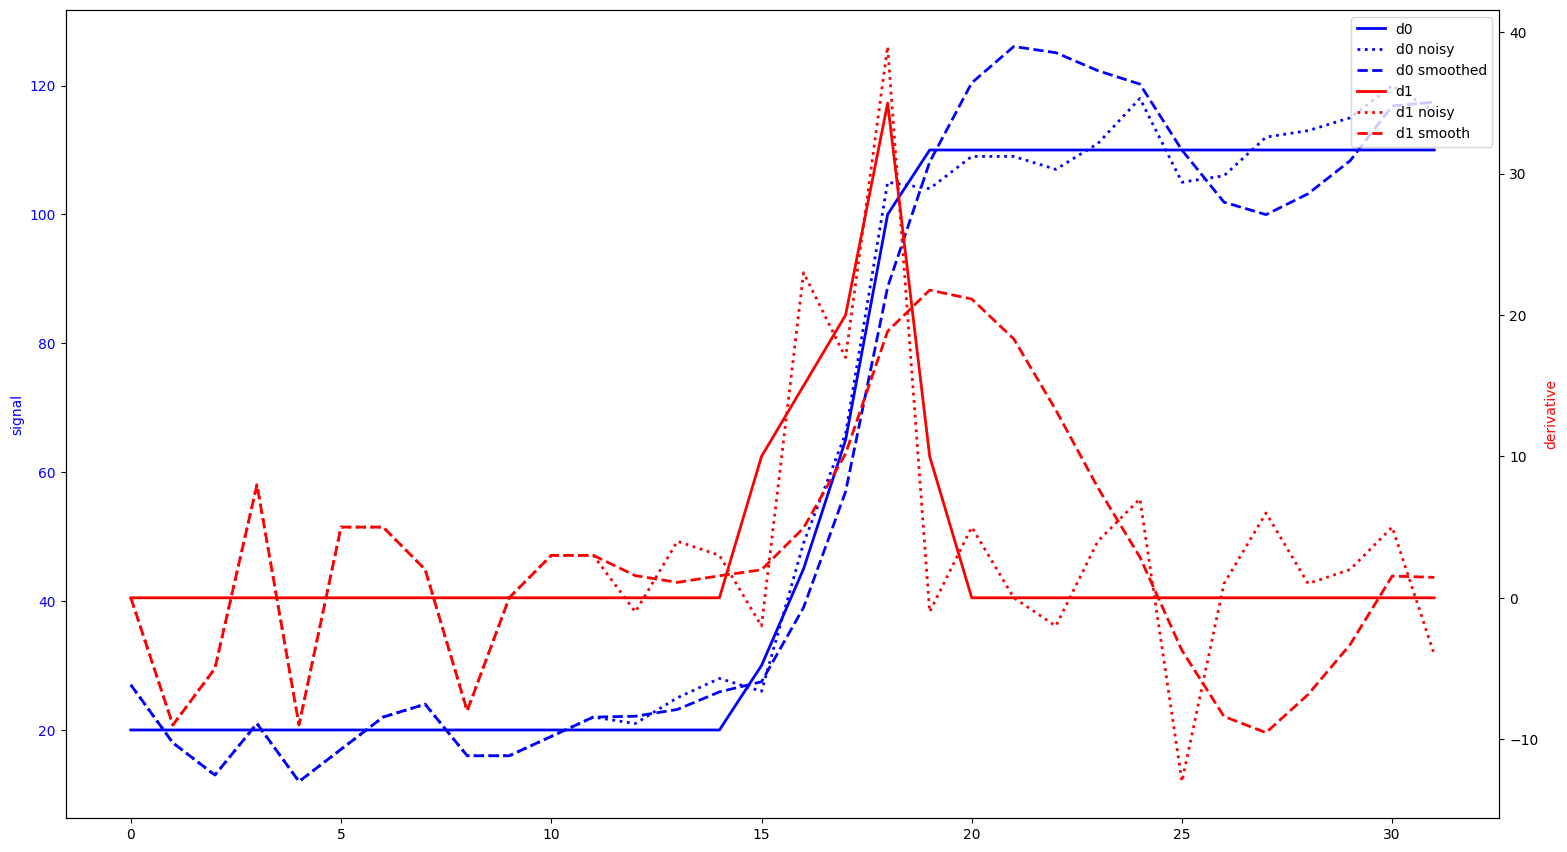

In [386]:
# x = np.linspace(0, 2 * np.pi, 100)
# y = np.sin(x) 
# y_noisy = y + np.random.random(100) * 0.2

y = np.array([20] * 15 + [30, 45, 65, 100, 110] + [110] * 12)
# y = np.array([20] * 15 + [23, 43, 63, 83, 103] + [110] * 12)
y_d1 = np.concatenate([[0], y[1:] - y[:-1]])
y_noisy = y + np.round(np.random.normal(0, 5, len(y)))
y_d1_noisy = np.concatenate([[0], y_noisy[1:] - y_noisy[:-1]])
x = [i for i in range(len(y))]

y_smooth = []
y_d1_smooth = []
for i in range(len(y_noisy)):
    if i < len(filter):
        y_smooth.append(y_noisy[i])
        y_d1_smooth.append(y_d1_noisy[i])
    else:
        y_smooth.append(np.dot(y_noisy[i-len(filter_d0)+1:i+1], filter_d0))
        y_d1_smooth.append(np.dot(y_noisy[i-len(filter_d1)+1:i+1], filter_d1))
        

# Sample data

# y_smooth = np.convolve(y, filter, mode='same')

# Create the plot
fig, ax1 = plt.subplots()
lw=2
# Plot the first line
ax1.plot(x, y, label='d0', color='blue', lw=lw)
ax1.plot(x, y_noisy, label='d0 noisy', color='blue',ls='dotted', lw=lw)
ax1.plot(x, y_smooth, label='d0 smoothed', color='blue', ls='--', lw=lw)
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y_d1, label='d1', color='red', lw=lw)
ax2.plot(x, y_d1_noisy, label='d1 noisy', color='red', ls='dotted', lw=lw)
ax2.plot(x, y_d1_smooth, label='d1 smooth', color='red', ls='--', lw=lw)
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y')#, labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.set_size_inches(18.5, 10.5)
plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

## Actual key data

In [ ]:
# folder of key data to analyse
# all log files in the same folder are assumed to come from the same setup
# i.e. same electronics setup, same note etc.
folder = r'./note logs/p to ff E'
files = os.listdir(folder)
files = [f for f in files if f.endswith('.txt')]
files = sorted(files)
file_lines = []
for file in files:
    # or open specific file
    # file = r'note logs\COM12_2025_02_08.20.03.58.575.txt'
    with open(os.path.join(folder, file), 'r') as f:
        lines = f.readlines()
        # trim whitespace
        lines = [line.strip() for line in lines]
    file_lines.append(lines)
lines[0]

'pitch:49,noteCount:180,noteOnHammerSpeed:0.009435,noteOnVelocity:34,rawADC:560,hammerPosition:562.835083,elapsedUs:307,iteration:32571739,'

In [3]:
# keys to keep
# keep all if empty
keys = [] #[49]
dfs = []
for lines in file_lines:
    strike = 0
    data = []
    for line in lines:
        # assumes a line looks like this:
        # key1:val1,key2:val2,...,keyN:valN,
        d = {s.split(':')[0]: s.split(':')[1] for s in line.split(',') if len(s) > 1}
        if len(keys) == 0 or int(d['pitch']) in keys:
            data.append(d)
        
    df = pd.DataFrame(data)
    # change all dtypes to numeric
    df = df.apply(pd.to_numeric, errors='ignore')
    # sort df by pitch, noteCount, and iteration
    # this shouldn't be necessary, but the line order is being scambled by the vscode serial extension
    # when writing serial output to file
    df = df.sort_values(['pitch', 'noteCount', 'iteration']).reset_index(drop=True)

    # some checks:
    # check each noteCount has the same number of rows
    assert df.groupby('noteCount').size().nunique() == 1
    # check df is unique on pitch, noteCount, and iteration
    assert all(df.groupby(['pitch', 'noteCount', 'iteration']).size() == 1)
    # check that the iteration is always increasing by 1, i.e. we haven't missed any iterations
    # it is very unlikely the same row count check would pass, and this one fail
    it_diffs = df.groupby(['pitch', 'noteCount']).iteration.diff()
    it_diffs = it_diffs.fillna(1)
    assert all(it_diffs == 1)

    dfs.append(df)
df



,pitch,noteCount,noteOnHammerSpeed,noteOnVelocity,rawADC,hammerPosition,elapsedUs,iteration
0,49,180,0.009435,34,560,562.835083,307,32571739
1,49,180,0.009435,34,560,563.576172,307,32571740
2,49,180,0.009435,34,559,564.291382,307,32571741
3,49,180,0.009435,34,561,564.980713,307,32571742
4,49,180,0.009435,34,562,565.644165,307,32571743
...,...,...,...,...,...,...,...,...
835,49,186,0.035662,127,745,660.000000,307,32590238
836,49,186,0.035662,127,744,660.000000,307,32590239
837,49,186,0.035662,127,743,660.000000,307,32590240
838,49,186,0.035662,127,742,660.000000,307,32590241


In [42]:
# check if ADC should be inverted or not, and get adc min / max
# min is key in up position, max is key in down position
inverted_notes = []
for df in dfs:
    for group, dfg in df.groupby('noteCount'):
        raw_adc = dfg['rawADC'].values
        # compare mean value of first half to second half
        mean1 = np.mean(raw_adc[:len(raw_adc)//2])
        mean2 = np.mean(raw_adc[len(raw_adc)//2:])    
        inverted_notes.append(mean1 > mean2)
    if all(inverted_notes):
        df['ADC'] = -df['rawADC']
        reverse = True

    elif not any(inverted_notes):
        df['ADC'] = df['rawADC']
        reverse = False
    else:
        assert False, 'some notes are reverse and some are not'


# max is affected by compression of felt, so we could do something fancier, e.g. subtract a percentage of the range
# of course, that is dependent on the maximum velocity of the loudest note
min_adc_val = np.median([df.ADC.min() for df in dfs])
# max_adc_val = np.median([df.ADC.max() for df in dfs])
max_adc_val = np.min([dfg.ADC.max() for df in dfs for noteCount, dfg in df.groupby('noteCount')])
# max_adc_val = 750
# max_adc_val = max_adc_val - 0.15 * (max_adc_val - min_adc_val)
print(min_adc_val, max_adc_val)

527.0 674


note on threshold: 676
37 96 96
{'note_count': 139, 'mean_key_strike_speed': 0.006640926366927404, 'hammer_speed': 0.02435241197456176, 'calc_velocity': None, 'strike_start': 37, 'strike_end': 96, 'orig_velocity': 94, 'min_adc_val': 531, 'max_adc_val': 733}


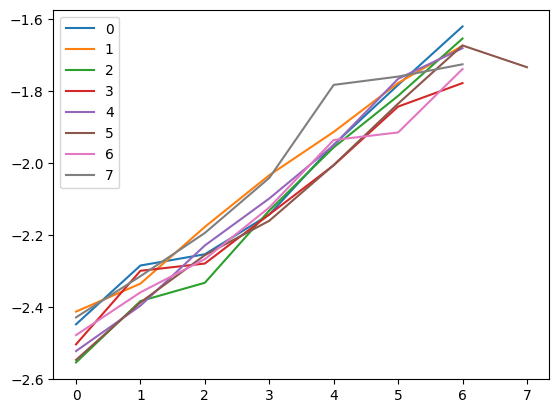

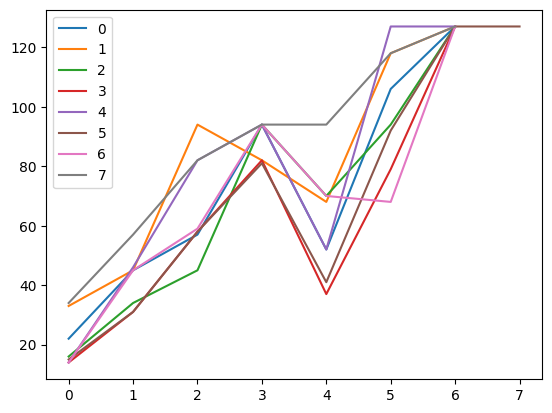

In [ ]:
# todo:
# try different filter paraeters
# map from log speed to velocity, expressing max speed in mm/s
# update arduino code, and collect data that includes softer notes
key_pos_filter = np.array([1,1,1,1], dtype=float)
# key_speed_filter = np.array([1, -1], dtype=float)
# standardize
key_pos_filter /= np.sum(key_pos_filter)
# key_speed_filter /= np.sum(key_speed_filter)

window_len = 8
polyorder=1
use='conv' # 'dot' or 'conv'
key_pos_filter = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=0,
    pos=window_len-1,
    use=use
)
key_speed_filter = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=1,
    # pos=0,
    pos=window_len-1,
    use=use
)

hammer_travel = 80 # mm

note_on_threshold = int((max_adc_val - min_adc_val) * 1.02 + min_adc_val)
# threshold for when key should trigger a note off
note_off_threshold = int((max_adc_val - min_adc_val) * 0.3 + min_adc_val)
# threshold for when key/hammer should be armed again
key_reset_threshold = int((max_adc_val - min_adc_val) * 0.75 + min_adc_val)

print('note on threshold:', note_on_threshold)

gravity_m = 9.81e-12 # metres per microsecond^2
gravity_mm = gravity_m * 1000 # mm per microsecond^2
gravity = gravity_mm  / hammer_travel * (max_adc_val - min_adc_val)

key_travel = 7
# mm of key travel per second to be considered a strike
key_strike_min_speed_mm_sec = 20
key_strike_min_speed_mm_US = key_strike_min_speed_mm_sec / 1e6
key_strike_min_speed = key_strike_min_speed_mm_US / key_travel * (max_adc_val - min_adc_val)
key_strike_min_speed

def apply_filter(vals, filter):
    """filter, duplicating the first value to keep the same length"""
    # filtered = np.convolve(vals, filter, mode='valid')
    filtered = np.convolve(np.concatenate([vals[:len(filter)-1], vals]), filter, mode='valid')
    return filtered

# for each set of notes, store a df with one row per note 
strike_dfs = []

sim_dfs = []

for df_i, df in enumerate(dfs):
    # plot colours, one colour for each noteCount
    colors = plt.cm.viridis(np.linspace(0, 1, len(df.noteCount.unique())))
    note_ons = []
    sim_lines = []

    for n, (noteCount, dfg) in enumerate(df.groupby('noteCount')):

        # if n > 2:
            # break
    # dfg = df[df.noteCount == df.noteCount.min()]

        # initializing strike index here and resetting to current index every time
        # the key stops moving down and the hammer is in contact with the key doesn't work
        #  I can't remember why that is, now!
        # 
        mean_key_strike_speed = None

        adc_vals = dfg.ADC.values
        elapsedUS_vals = dfg.elapsedUs.values

        key_pos_vals = apply_filter(adc_vals, key_pos_filter)
        key_speed_vals = apply_filter(adc_vals, key_speed_filter)
        key_speed_naive_vals = apply_filter(adc_vals, [1, -1])
        key_speed_vals = [v / e for v, e in zip(key_speed_vals, elapsedUS_vals)]
        key_speed_naive_vals = [v / e for v, e in zip(key_speed_naive_vals, elapsedUS_vals)]
        hammer_pos = key_pos_vals[0]
        hammer_speed = 0

        hammer_pos_vals = []
        hammer_speed_vals = []

        note_on_idx = None
        note_on_hammer_speed = None
        note_on_vel = None
        strike_start = None
        strike_end = None

        for i, v in enumerate(key_pos_vals[1:]):
            key_pos = key_pos_vals[i]
            key_speed = key_speed_vals[i]
            elapsedUS = elapsedUS_vals[i]

            original_hammer_speed = hammer_speed
            
            hammer_speed -= gravity * elapsedUS

            hammer_pos += (hammer_speed + original_hammer_speed) * elapsedUS / 2

            if hammer_pos < key_pos:
                hammer_pos = key_pos
                if hammer_speed < key_speed:
                    hammer_speed = key_speed
            
            hammer_pos_vals.append(hammer_pos)
            hammer_speed_vals.append(hammer_speed)

            if (hammer_pos > note_on_threshold) and (note_on_idx is None):
                # velocity = _get_hammer_midi_velocity()
                note_on_idx = i
                note_on_hammer_speed = hammer_speed
                # hammer_pos = key_reset_threshold
                hammer_speed = -hammer_speed

                strike_start = i
                positive_speed_time = 0
                while np.sum(elapsedUS_vals[strike_start:i+1]) < 2000 or key_speed_vals[strike_start] > key_strike_min_speed or positive_speed_time < 2000:
                    strike_start -= 1
                    if key_speed_vals[strike_start] > 0:
                        positive_speed_time += elapsedUS_vals[strike_start]
                strike_end = i
                mean_key_strike_speed = np.mean(key_speed_vals[strike_start:i+1])

                if noteCount == 139:
                    print(strike_start, strike_end, i)
                
                # if df_i == 2:
                # plt.plot(key_pos_vals)
                # plt.axvline(strike_start)
                # plt.axvline(i+1)
                # plt.show()
            sim_lines.append({
                'noteCount': noteCount,
                'ADC': adc_vals[i],
                'key_pos': key_pos_vals[i],
                'key_speed': key_speed_vals[i],
                'key_speed_naive': key_speed_naive_vals[i],
                'hammer_pos': hammer_pos,
                'hammer_speed': hammer_speed,
                'elapsedUS': elapsedUS
                })
        note_ons.append({
            'note_count': noteCount,
            'mean_key_strike_speed': mean_key_strike_speed,
            'hammer_speed': note_on_hammer_speed,
            'calc_velocity': note_on_vel,
            'strike_start': strike_start,
            'strike_end': strike_end,
            'orig_velocity': dfg.noteOnVelocity.values[0],
            'min_adc_val': min(adc_vals),
            'max_adc_val': max(adc_vals)
            })
        if noteCount == 139:
            print(note_ons[-1])
        
        
        # plt.plot(key_pos_vals, color=colors[n])
        # plt.plot(hammer_pos_vals, color=colors[n], ls='--')
        # plt.axhline(note_on_threshold, color='r')

        # plt.plot(key_speed_vals, color=colors[n])
        # plt.plot(hammer_speed_vals, color=colors[n], ls='--')
        # create horizontal line at note on threshold
    strikes = pd.DataFrame(note_ons)
    strike_dfs.append(strikes)
    sim_dfs.append(pd.DataFrame(sim_lines))
    
    # plt.show()


for i, strikes in enumerate(strike_dfs):
    plt.plot(np.log10(strikes.mean_key_strike_speed), label=i)
    plt.legend()
plt.show()
for i, strikes in enumerate(strike_dfs):
    plt.plot(strikes.orig_velocity, label=i)
    plt.legend()

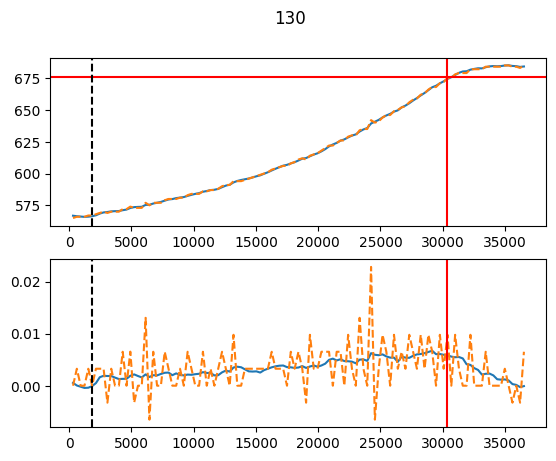

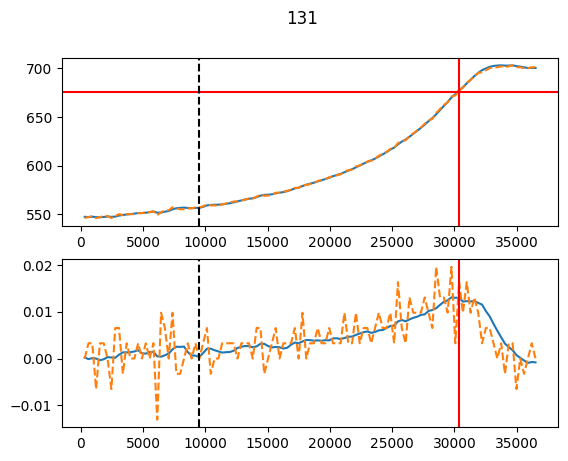

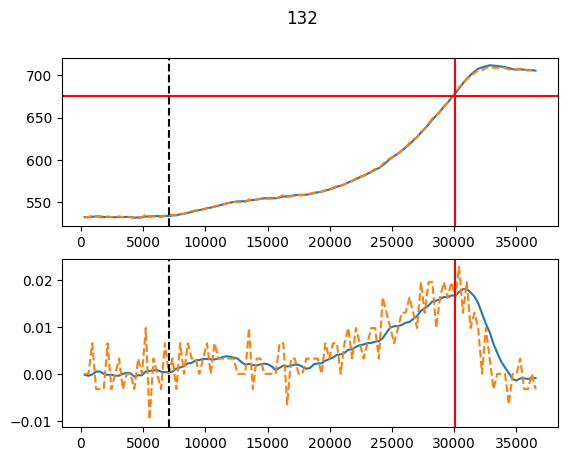

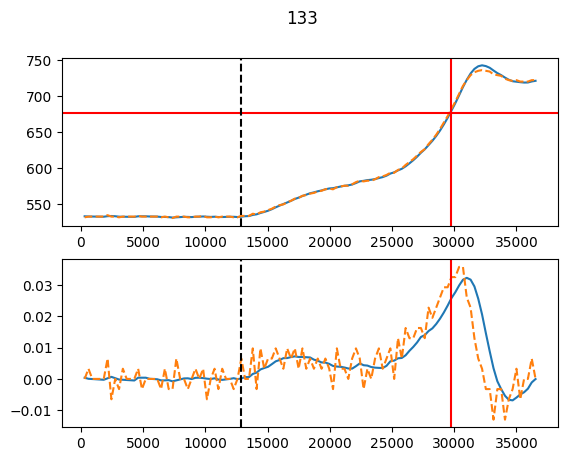

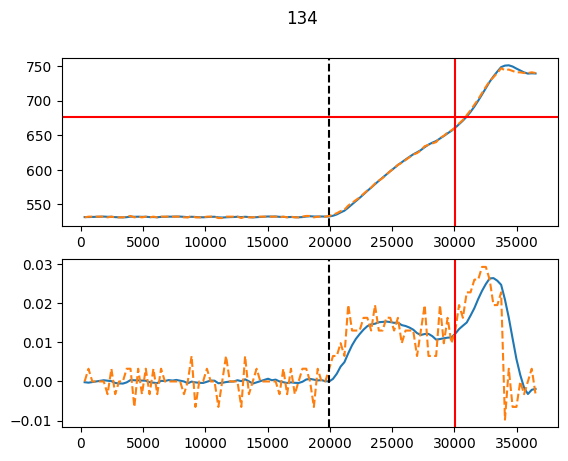

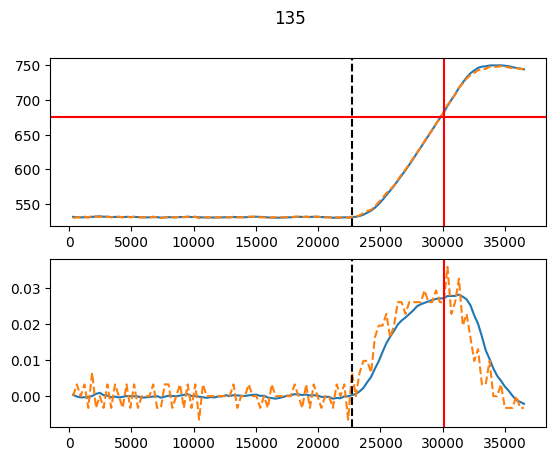

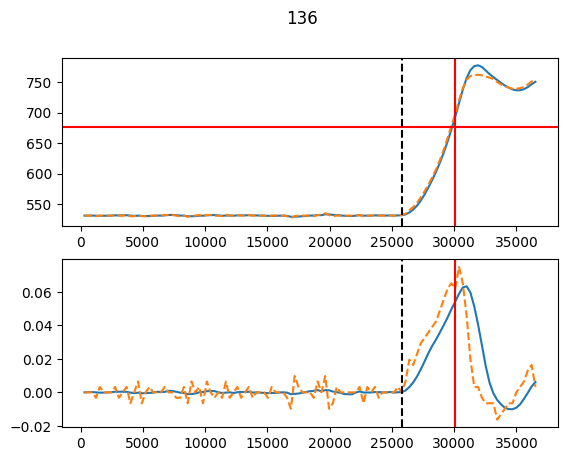

In [47]:
# for strike_df, sim_df in zip(strike_dfs, sim_dfs):
n = 0 
strike_df, sim_df = strike_dfs[n], sim_dfs[n]
n_notes = len(strike_df)
for i, (noteCount, dfg) in enumerate(sim_df.groupby('noteCount')):
    elapsed_cumsum = dfg.elapsedUS.cumsum().values
    x = elapsed_cumsum
    # two panel plot for key pos and key speed
    fig, axs = plt.subplots(2)
    fig.suptitle(noteCount)
    axs[0].plot(x, dfg.key_pos.reset_index(drop=True))#, np.arange(len(dfg)))
    axs[0].plot(x, dfg.ADC.reset_index(drop=True), ls='--')#, np.arange(len(dfg)), ls='--')
    axs[0].axhline(note_on_threshold, color='r')
    if not np.isnan(strike_df.strike_end.values[i]):
        axs[0].axvline(x[int(strike_df.strike_end.values[i])], color='r')
    if not np.isnan(strike_df.strike_start.values[i]):
        axs[0].axvline(x[int(strike_df.strike_start[i])], color='black', ls='--')

    axs[1].plot(x, dfg.key_speed.reset_index(drop=True))
    axs[1].plot(x, dfg.key_speed_naive.reset_index(drop=True), ls='--')
    if not np.isnan(strike_df.strike_end.values[i]):
        axs[1].axvline(x[int(strike_df.strike_end.values[i])], color='r')
    if not np.isnan(strike_df.strike_start.values[i]):
        axs[1].axvline(x[int(strike_df.strike_start[i])], color='black', ls='--')
    plt.show()
        